Nome Rm Email

# Busca Quântica com Caminhada Quântica (Quantum Walk Search)

A Busca Quântica com Caminhada Quântica (Quantum Walk Search) é um algoritmo quântico que visa encontrar uma solução para um problema em um banco de dados não ordenado de forma mais eficiente do que algoritmos clássicos de busca. Vamos explicar o funcionamento da Busca Quântica com Caminhada Quântica, incluindo a parte matemática.

## Pré-requisitos

- Compreensão básica de computação quântica.
- Familiaridade com operações matemáticas, como somas complexas e exponenciais.
- Conhecimento prévio sobre algoritmos de busca.

## Etapas da Busca Quântica com Caminhada Quântica

A Busca Quântica com Caminhada Quântica envolve as seguintes etapas:

### 1. Inicialização do Estado

- Inicializa-se um estado quântico que representa o banco de dados não ordenado.
- Esse estado quântico é frequentemente uma superposição de todos os elementos no banco de dados.

### 2. Oráculo de Busca

- Um oráculo de busca é aplicado ao estado quântico.
- O oráculo de busca identifica a solução para o problema no banco de dados e aplica uma fase negativa apenas a essa solução, alterando as amplitudes dos estados.

### 3. Operador de Reflexão

- Após a aplicação do oráculo de busca, um operador de reflexão é aplicado.
- Esse operador reflete o estado em relação à média de todas as amplitudes.
- Ele amplifica as amplitudes das soluções.

### 4. Iteração

- As etapas 2 e 3 são repetidas várias vezes para amplificar as amplitudes das soluções e reduzir as amplitudes das outras entradas.

### 5. Medição

- Após um número suficiente de iterações, o estado é medido.
- As medições colapsam o estado quântico em uma solução.

## Matemática da Busca Quântica com Caminhada Quântica

A parte matemática da Busca Quântica com Caminhada Quântica envolve a aplicação de operadores de fase e reflexão em um espaço de estado quântico. Esses operadores manipulam as amplitudes dos estados, aumentando as amplitudes das soluções desejadas.

A eficiência do algoritmo é alcançada por meio da amplificação de amplitudes das soluções e da redução das amplitudes das outras entradas no banco de dados.

## Aplicações

A Busca Quântica com Caminhada Quântica é usada em algoritmos quânticos de busca, como o algoritmo de Grover. É especialmente eficaz em situações em que a solução é única e a estrutura do banco de dados é desconhecida.

## Conclusão

A Busca Quântica com Caminhada Quântica é uma técnica quântica poderosa para encontrar soluções em bancos de dados não ordenados. Ela utiliza operadores quânticos para amplificar as amplitudes das soluções desejadas. Esta técnica é fundamental para o desempenho de algoritmos quânticos de busca.

Espero que esta explicação tenha esclarecido o funcionamento da Busca Quântica com Caminhada Quântica, incluindo a parte matemática envolvida.


In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import QFT
from numpy import pi
from qiskit.quantum_info import Statevector
from matplotlib import pyplot as plt
import numpy as np
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/tmp/ipykernel_698/3330678225.py:12: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


O código cria um circuito quântico chamado one_step_circuit que representa o operador de um passo da caminhada quântica. Isso inclui a aplicação de operadores de moeda e um operador de deslocamento. O circuito é então convertido em uma instrução chamada one_step_gate.

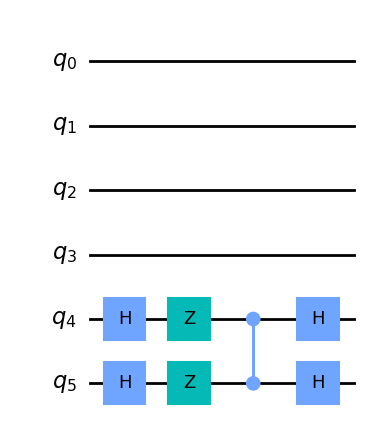

In [2]:
one_step_circuit = QuantumCircuit(6, name=' ONE STEP') 
# Coin operator
one_step_circuit.h([4,5])
one_step_circuit.z([4,5])
one_step_circuit.cz(4,5)
one_step_circuit.h([4,5])
one_step_circuit.draw()

São criados circuitos para operadores de controle (cont_one_step e inv_cont_one_step) com base no operador de um passo. Esses circuitos são convertidos em instruções chamadas cont_one_step_gate e inv_cont_one_step_gate.

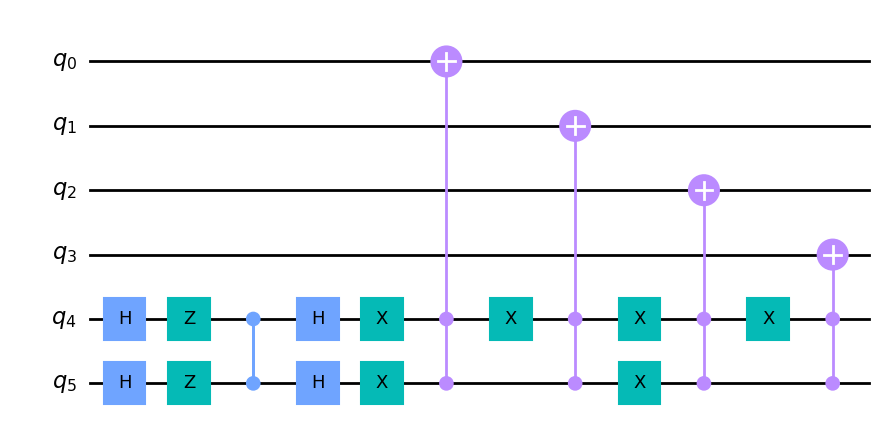

In [3]:
# Shift operator function for 4d-hypercube
def shift_operator(circuit):
    for i in range(0,4):
        circuit.x(4)
        if i%2==0:
            circuit.x(5)
        circuit.ccx(4,5,i)

shift_operator(one_step_circuit)

one_step_gate = one_step_circuit.to_instruction() 
one_step_circuit.draw()

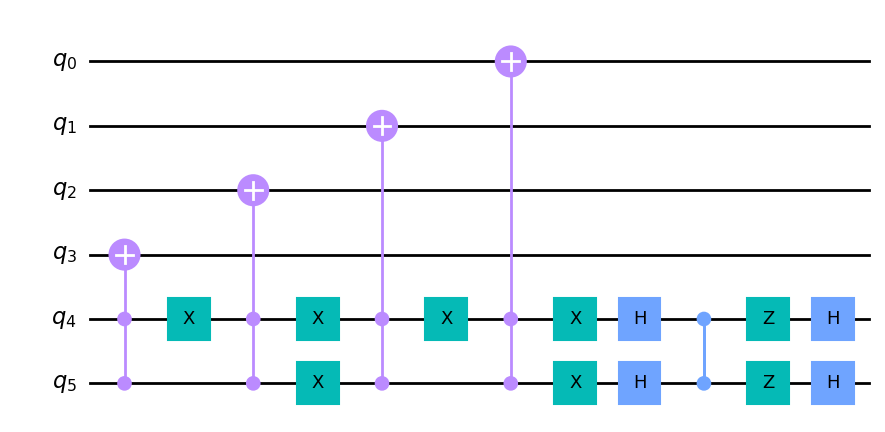

In [4]:
one_step_circuit.inverse().draw()

In [5]:
# Make controlled gates
inv_cont_one_step = one_step_circuit.inverse().control()
inv_cont_one_step_gate = inv_cont_one_step.to_instruction()
cont_one_step = one_step_circuit.control()
cont_one_step_gate = cont_one_step.to_instruction()

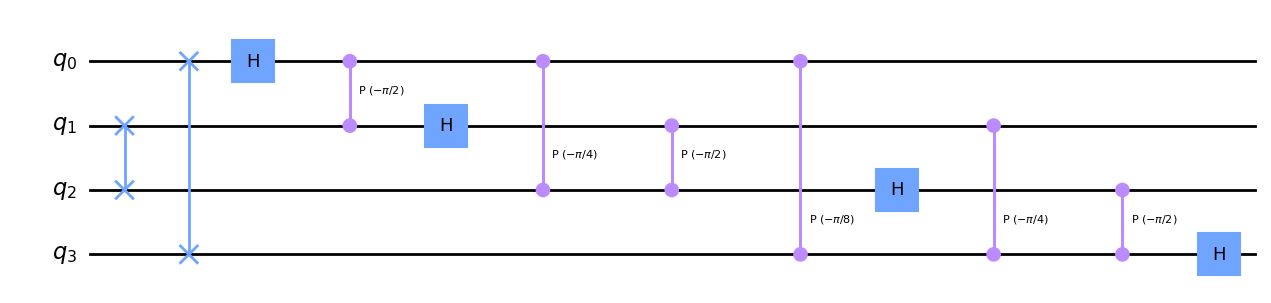

In [6]:
inv_qft_gate = QFT(4, inverse=True).to_instruction()  
qft_gate = QFT(4, inverse=False).to_instruction()

QFT(4, inverse=True).decompose().draw("mpl")

O código cria um circuito quântico chamado phase_circuit que representa o oráculo de fase. Esse oráculo é projetado para marcar determinados estados no grafo hiperdimensional.

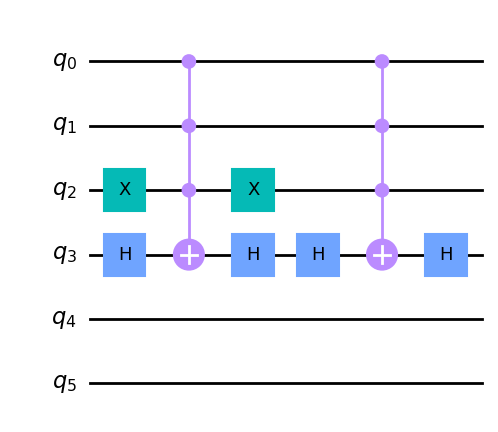

In [7]:
phase_circuit =  QuantumCircuit(6, name=' phase oracle ')
# Mark 1011
phase_circuit.x(2)
phase_circuit.h(3)
phase_circuit.mct([0,1,2], 3)
phase_circuit.h(3)
phase_circuit.x(2)
# Mark 1111
phase_circuit.h(3)
phase_circuit.mct([0,1,2],3)
phase_circuit.h(3)
phase_oracle_gate = phase_circuit.to_instruction()
# Phase oracle circuit
phase_oracle_circuit =  QuantumCircuit(11, name=' PHASE ORACLE CIRCUIT ')
phase_oracle_circuit.append(phase_oracle_gate, [4,5,6,7,8,9])
phase_circuit.draw()

O código cria instruções para os operadores personalizados: phase_oracle_gate para o oráculo de fase e mark_auxiliary_gate para marcar certos ângulos theta.

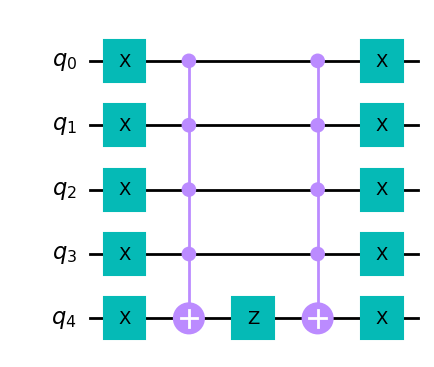

In [8]:
# Mark q_4 if the other qubits are non-zero 
mark_auxiliary_circuit = QuantumCircuit(5, name=' mark auxiliary ')
mark_auxiliary_circuit.x([0,1,2,3,4])
mark_auxiliary_circuit.mct([0,1,2,3], 4)
mark_auxiliary_circuit.z(4)
mark_auxiliary_circuit.mct([0,1,2,3], 4)
mark_auxiliary_circuit.x([0,1,2,3,4])

mark_auxiliary_gate = mark_auxiliary_circuit.to_instruction()
mark_auxiliary_circuit.draw()

O código cria um circuito quântico chamado phase_estimation_circuit que executa a estimação de fase. Ele aplica transformadas de Fourier quânticas, marca ângulos não nulos com um qubit auxiliar e depois realiza a transformada inversa de Fourier quântica.

In [9]:
# Phase estimation
phase_estimation_circuit = QuantumCircuit(11, name=' phase estimation ')
phase_estimation_circuit.h([0,1,2,3])
for i in range(0,4):
    stop = 2**i
    for j in range(0,stop):
        phase_estimation_circuit.append(cont_one_step, [i,4,5,6,7,8,9])

In [10]:
# Inverse fourier transform
phase_estimation_circuit.append(inv_qft_gate, [0,1,2,3])

In [11]:
# Mark all angles theta that are not 0 with an auxiliary qubit
phase_estimation_circuit.append(mark_auxiliary_gate, [0,1,2,3,10])

In [12]:
# Reverse phase estimation
phase_estimation_circuit.append(qft_gate, [0,1,2,3])   

for i in range(3,-1,-1):
    stop = 2**i
    for j in range(0,stop):
        phase_estimation_circuit.append(inv_cont_one_step, [i,4,5,6,7,8,9])
phase_estimation_circuit.barrier(range(0,10))
phase_estimation_circuit.h([0,1,2,3])

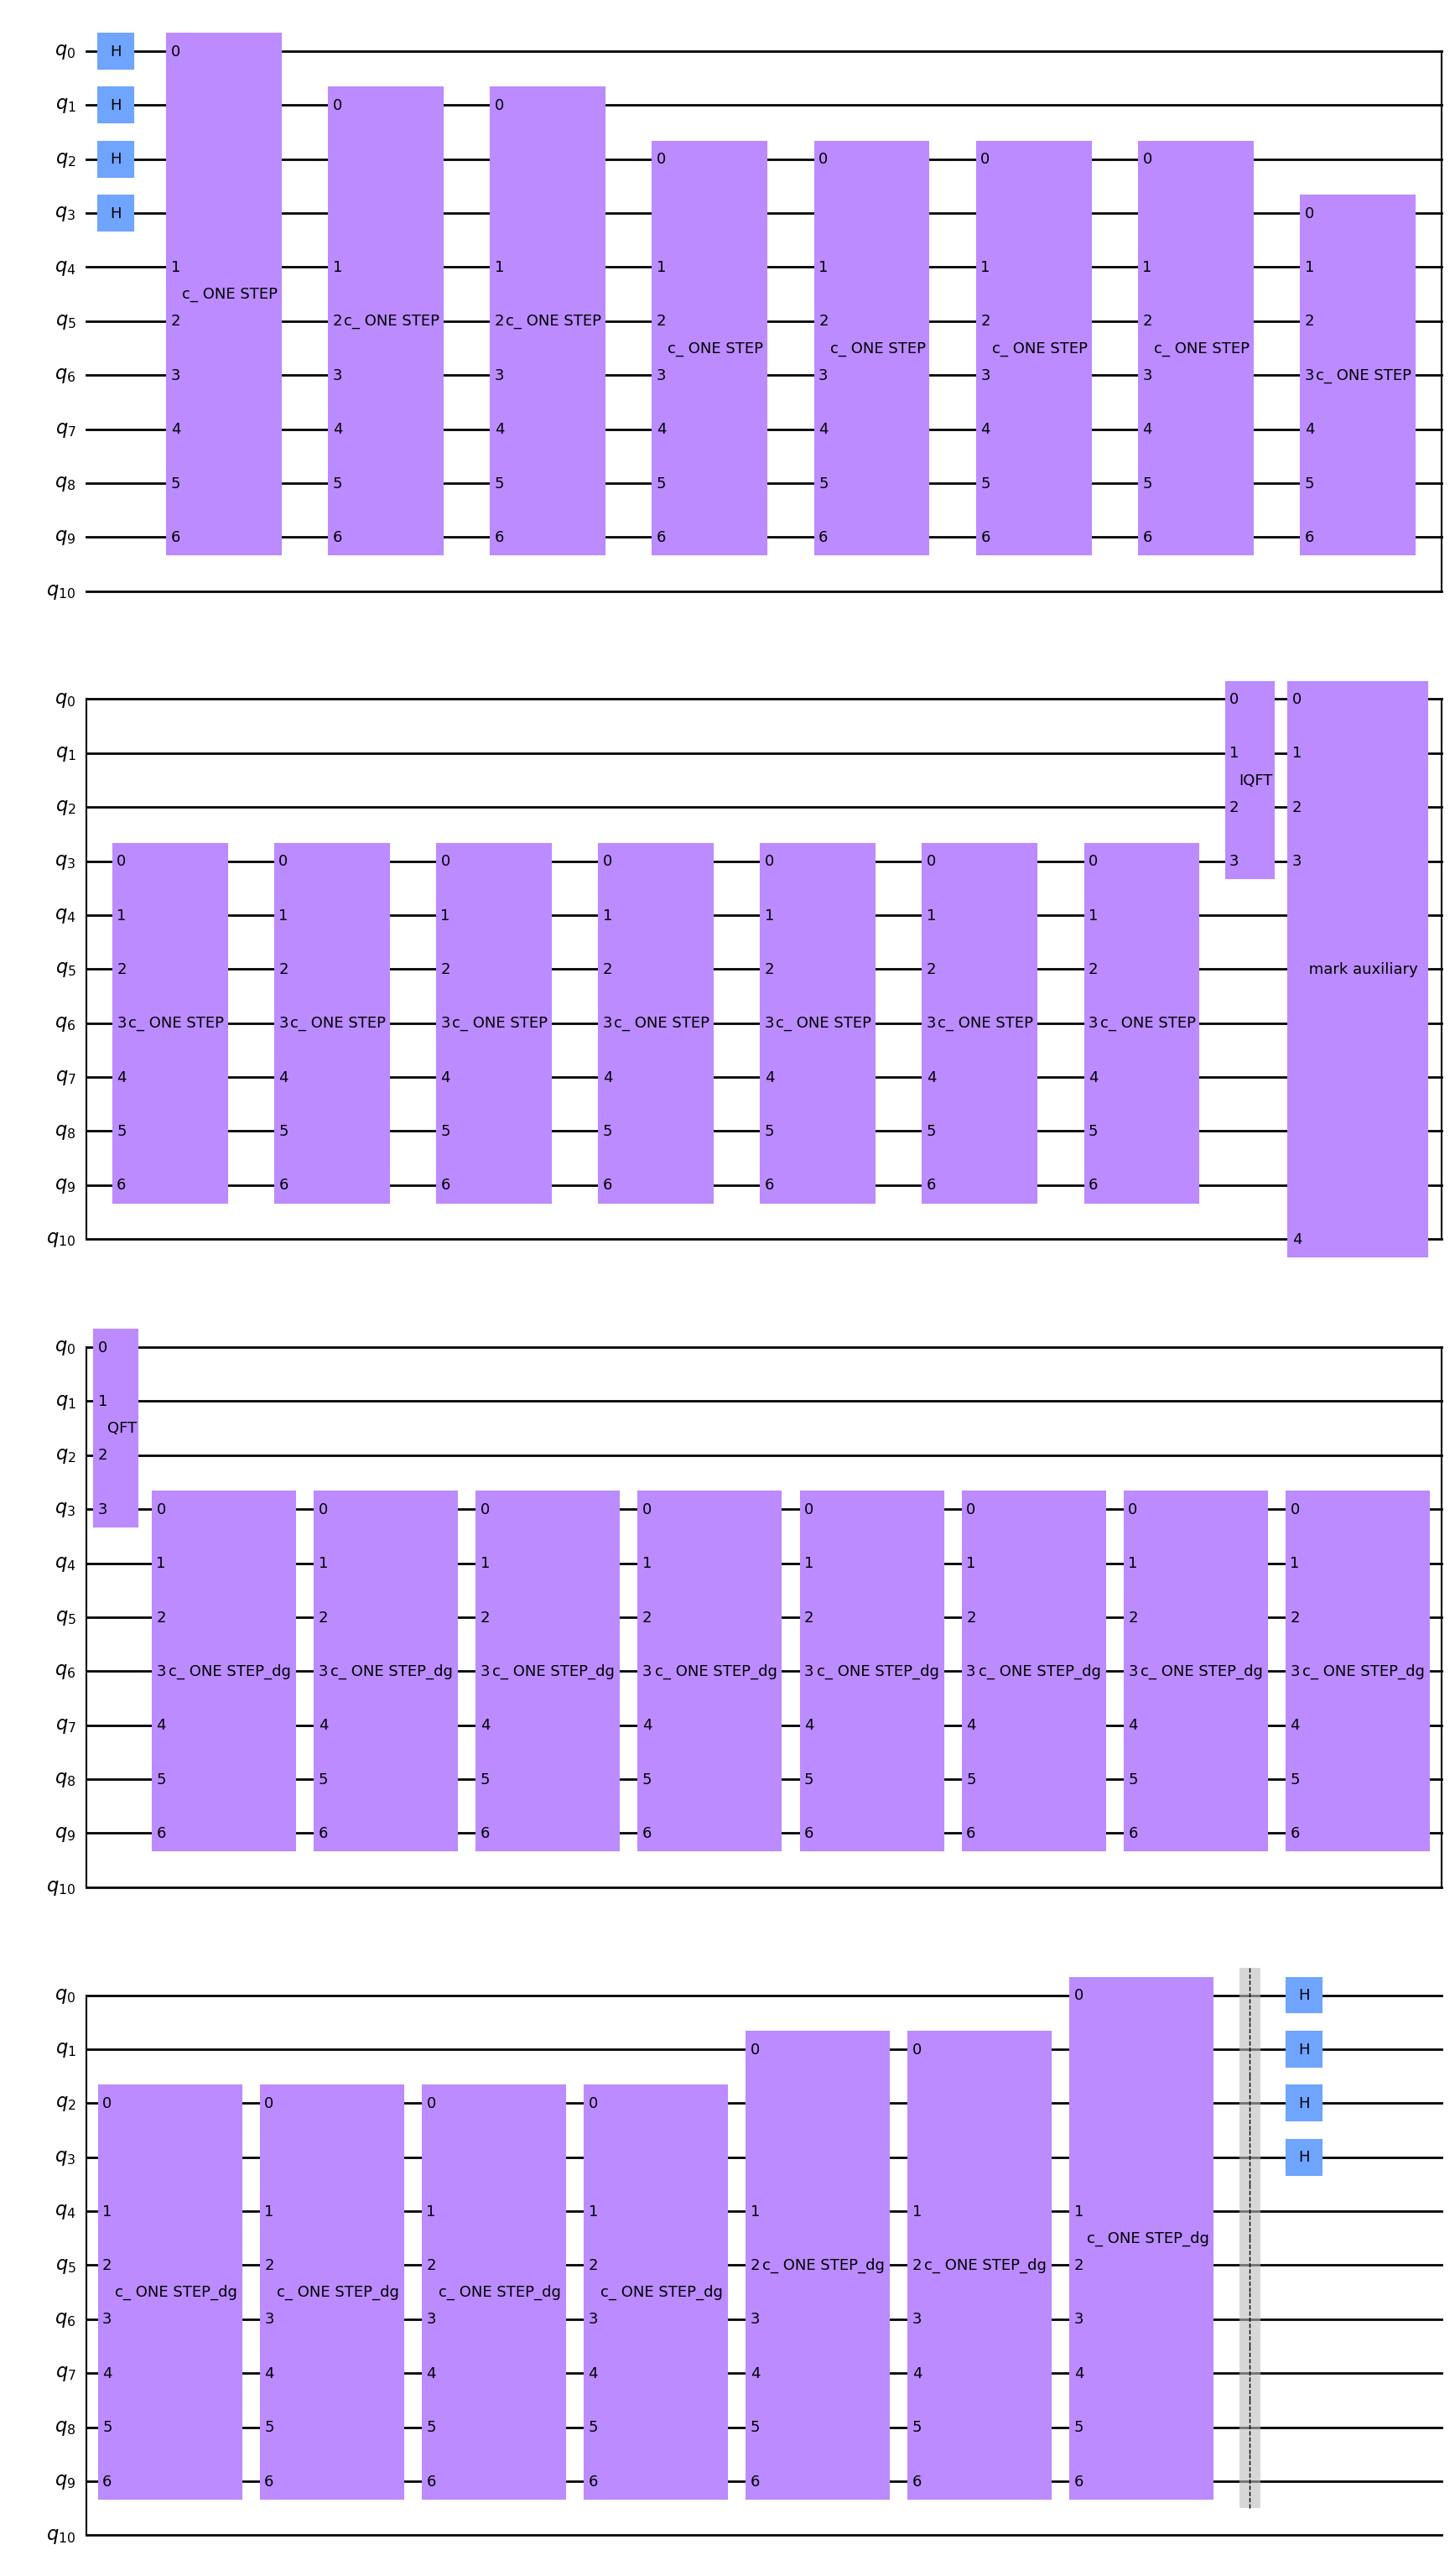

In [13]:
# Make phase estimation gate
phase_estimation_gate = phase_estimation_circuit.to_instruction()
phase_estimation_circuit.draw()

O código cria registros quânticos para os qubits theta, os qubits de nó, os qubits de moeda e um qubit auxiliar. Em seguida, ele cria o circuito quântico circuit que aplica a caminhada quântica por um número especificado de iterações. Ele aplica o oráculo de fase e a estimação de fase em cada iteração. O resultado é medido nos qubits de nó.

In [14]:
# Implementation of the full quantum walk search algorithm
theta_q = QuantumRegister(4, 'theta')
node_q = QuantumRegister(4, 'node')
coin_q = QuantumRegister(2, 'coin')
auxiliary_q = QuantumRegister(1, 'auxiliary')
creg_c2 = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(theta_q, node_q, coin_q, auxiliary_q, creg_c2)
# Apply Hadamard gates to the qubits that represent the nodes and the coin
circuit.h([4,5,6,7,8,9])
iterations = 2

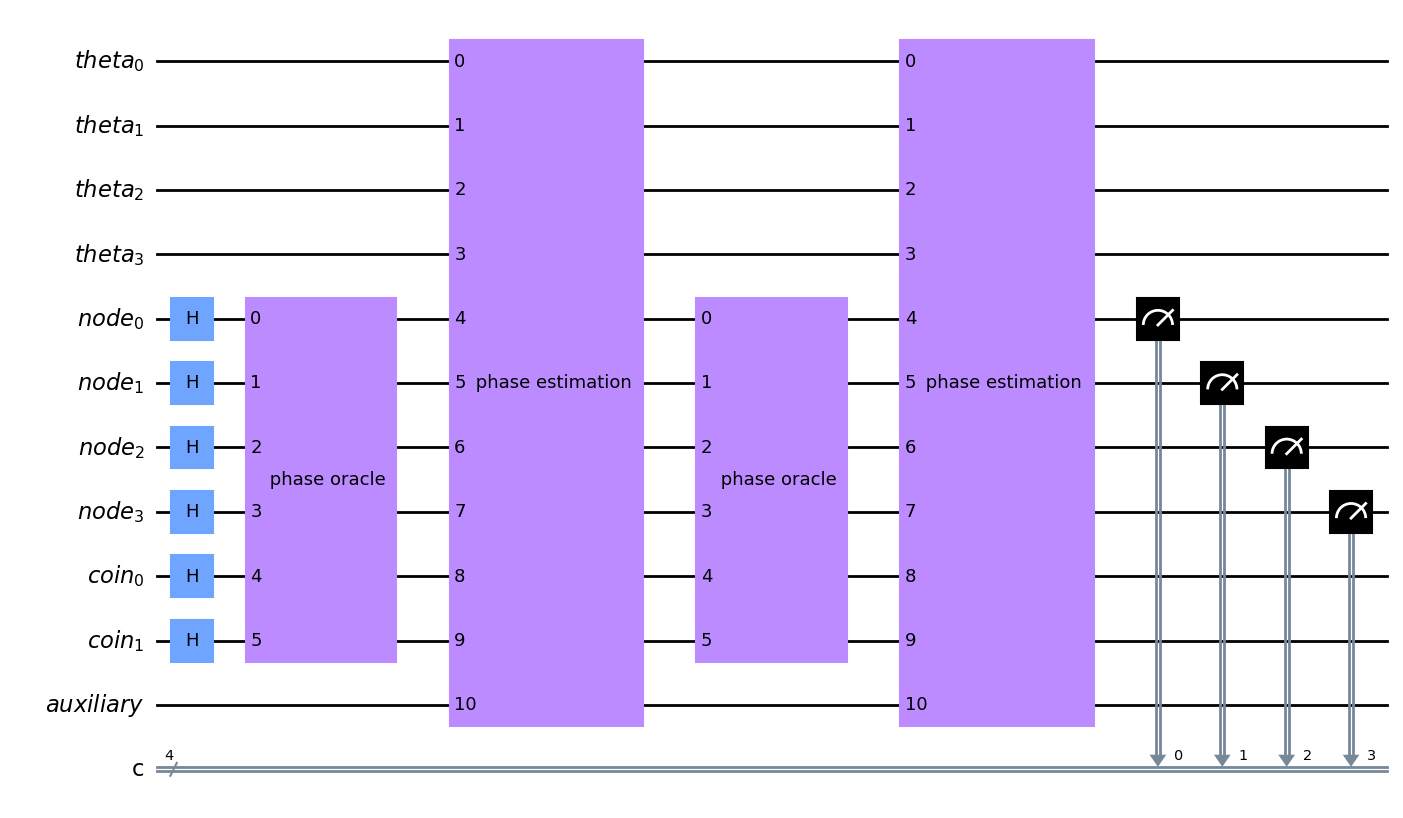

In [15]:
for i in range(0,iterations):
    circuit.append(phase_oracle_gate, [4,5,6,7,8,9])
    circuit.append(phase_estimation_gate, [0,1,2,3,4,5,6,7,8,9,10])

circuit.measure(node_q[0], creg_c2[0])
circuit.measure(node_q[1], creg_c2[1])
circuit.measure(node_q[2], creg_c2[2])
circuit.measure(node_q[3], creg_c2[3])
circuit.draw()

O código executa o circuito no simulador Aer com um número específico de tiros. Os resultados são exibidos em um histograma.

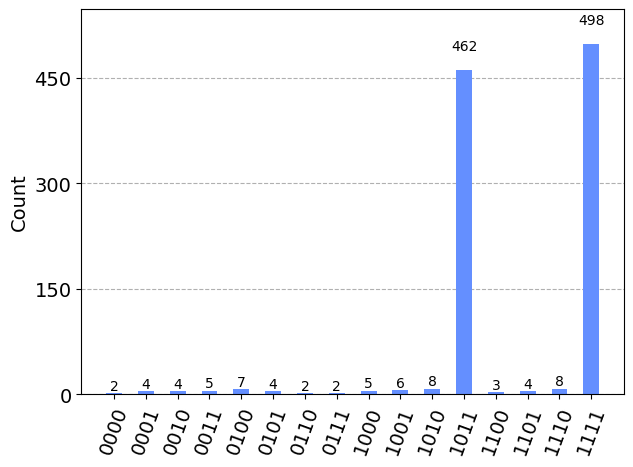

In [16]:
backend = Aer.get_backend('qasm_simulator') 
job = execute( circuit, backend, shots=1024 ) 
hist = job.result().get_counts() 
plot_histogram( hist )